In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# all_files_list = os.listdir(os.path.join(os.getcwd(), "sample_data"))[2:-4]

In [0]:
img_size = 256

In [0]:
img_to_predict = "./1.jpg"

In [0]:
# function to return the correct shape from a image path
def prepare_image(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    
    img_gaussian_blur = cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT)
    dst = cv2.subtract(img_gaussian_blur, img)
    img = cv2.Canny(dst, 300, 300)
    
    img = cv2.resize(img, (img_size, img_size))
    return img.reshape(-1, img_size, img_size, 1)

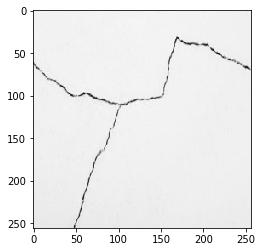

In [497]:
img = cv2.resize(cv2.imread(img_to_predict), (img_size, img_size))
plt.imshow(img)

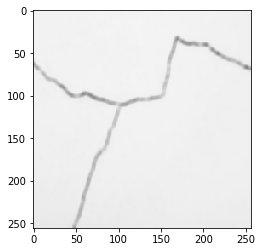

In [498]:
img_gaussian_blur = cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT)
plt.imshow(img_gaussian_blur)

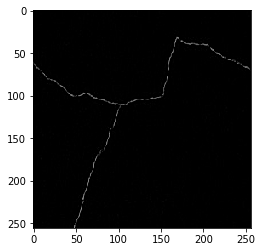

In [499]:
# mask = new cv2.Mat()
# dst = new cv2.Mat()
dst = cv2.subtract(img_gaussian_blur, img)
plt.imshow(dst)

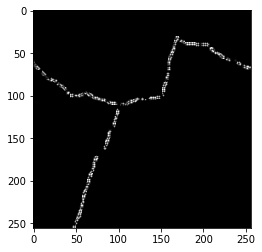

In [500]:
canny_edges = cv2.Canny(dst, 300, 300)
canny_edges = cv2.cvtColor(canny_edges, cv2.COLOR_BayerBG2GRAY)
plt.imshow(canny_edges, cmap="gray")

In [501]:
n_black_pix = np.sum(canny_edges == 0)
print('Number of Black pixels:', n_black_pix)

Number of Black pixels: 63311


In [502]:
canny_total_pixels = canny_edges.shape[0]*canny_edges.shape[1]
intensity = (canny_total_pixels - n_black_pix)/canny_total_pixels
print("Intensity :",intensity*100,"%")

Intensity : 3.39508056640625 %


In [503]:
mean = np.mean(canny_edges)
print(mean)

2.830963134765625


In [504]:
import math
print("Intensity level: ",int(mean*2))

Intensity level:  5


In [0]:
# prepare_image(img_to_predict).shape

In [0]:
# model = tf.keras.models.load_model("./crack_classifier.model")

In [0]:
# prediction = model.predict([prepare_image(img_to_predict)])

In [0]:
# # Setting the threshold
# if prediction[0][0] <= .5:
#     pred_text = "Crack with confidence of {:.2f}%".format((1 - prediction[0][0]) * 100)
# elif prediction[0][0] > .5:
#     pred_text = "Intact with confidence of {:.2f}%".format((1 - prediction[0][0]) * 100)
# else:
#     print("\nSomething went wrong...")

In [0]:
# plt.imshow(cv2.resize(cv2.imread(img_to_predict), (img_size, img_size)))

In [0]:
# print(pred_text)

In [0]:
# from tensorflow.keras.models import model_from_json